In [2]:
require 'nn'

{
  VolumetricMaxUnpooling : table: 0x41d348d8
  ConcatTable : table: 0x40f2a188
  MV : table: 0x40b26250
  SpatialAveragePooling : table: 0x402f9238
  SpatialConvolutionMM : table: 0x41101410
  VolumetricReplicationPadding : table: 0x41d39e68
  Reshape : table: 0x40594028
  Jacobian : 
    {
      forward : function: 0x40b2e8f0
      testAllUpdate : function: 0x40b2eba0
      testDiagHessianInput : function: 0x40b2eb20
      testDiagHessianWeight : function: 0x40b2eb40
      testDiagHessianBias : function: 0x40b2eb60
      testDiagHessian : function: 0x40b2eb00
      testJacobian : function: 0x40b2eaa0
      testIO : function: 0x40b2eb80
      testJacobianUpdateParameters : function: 0x40b2eae0
      backwardDiagHessian : function: 0x40b2e978
      testJacobianParameters : function: 0x40b2eac0
      backwardUpdate : function: 0x40b2e8d0
      forwardUpdate : function: 0x40b2ea80
      backward : function: 0x40b2e878
      linearModuleDiagHessian : function: 0x40b2e998
    }
  SparseLi


  Bilinear : table: 0x40590198
  SpatialReplicationPadding : table: 0x41fed990
  SpatialUpSamplingBilinear : table: 0x41ff27d8
  Padding : table: 0x4078f668
  Container : table: 0x416cc750
  MarginRankingCriterion : table: 0x40084578
  Module : table: 0x40a98070
  VolumetricFullConvolution : table: 0x41d23e90
  Concat : table: 0x40597cc8
  CrossEntropyCriterion : table: 0x40b19300
  LookupTable : table: 0x410ee2a0
  SpatialSoftMax : table: 0x41d65f68
  HardShrink : table: 0x41d73250
  Abs : table: 0x41d6e058
  SparseJacobian : 
    {
      forward : function: 0x40b2eec8
      testJacobian : function: 0x40b2c168
      testIO : function: 0x40b2ee70
      testAllUpdate : function: 0x40b2c0e0
      testJacobianParameters : function: 0x40b2eee8
      testJacobianUpdateParameters : function: 0x40b2b808
      forwardUpdate : function: 0x40b2c148
      backward : function: 0x40b2b7e8
      backwardUpdate : function: 0x40b2eea8
    }
  SoftMin : table: 0x41d66c90
  Maxout : table: 0x41d778a0
 

    }
  AddConstant : table: 0x415fa490
  SpatialDilatedMaxPooling : table: 0x402ef128
  CMul : table: 0x416786a8
  CosineDistance : table: 0x417e5ed0
  Index : table: 0x407a4b08
  Mean : table: 0x41679df8
  MultiLabelSoftMarginCriterion : table: 0x40b11d70
  Dropout : table: 0x415fcaa0
  MultiLabelMarginCriterion : table: 0x4007e720
  SoftPlus : table: 0x41d685f8
  CosineEmbeddingCriterion : table: 0x40082828
  L1HingeEmbeddingCriterion : table: 0x4007d3b8
  DistKLDivCriterion : table: 0x40079ba0
  SpatialDivisiveNormalization : table: 0x41fe2368
  L1Penalty : table: 0x40b14768
  ClassNLLCriterion : table: 0x400727f8
  VolumetricDilatedMaxPooling : table: 0x41d2ea60
  Sqrt : table: 0x41d71df8
  Sequential : table: 0x4021f208
  MarginCriterion : table: 0x4006d300
  SmoothL1Criterion : table: 0x4006bbe8
  Square : table: 0x41d70950
  CDivTable : table: 0x40775840
  MSECriterion : table: 0x400677f0
  Criterion : table: 0x40f37908
  NarrowTable : table: 0x40f38298
  SoftMax : table: 0x41d

In [3]:
require 'paths'
if (not paths.filep("cifar10torchsmall.zip")) then
    os.execute('wget -c https://s3.amazonaws.com/torch7/data/cifar10torchsmall.zip')
    os.execute('unzip cifar10torchsmall.zip')
end
trainset = torch.load('cifar10-train.t7')
testset = torch.load('cifar10-test.t7')
classes = {'airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}


In [4]:
print(trainset)


{
  data : ByteTensor - size: 10000x3x32x32
  label : ByteTensor - size: 10000
}


In [5]:
print(#trainset.data)

 10000
     3
    32
    32
[torch.LongStorage of size 4]



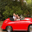

In [6]:
itorch.image(trainset.data[100])

In [7]:
print(classes[trainset.label[100]])


automobile	


In [8]:
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);
trainset.data = trainset.data:double()

In [9]:
function trainset:size() 
    return self.data:size(1) 
end

In [10]:
print(trainset:size())

10000	


In [11]:
print(trainset[33])

{
  1 : DoubleTensor - size: 3x32x32
  2 : 2
}


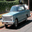

In [12]:
itorch.image(trainset[33][1])

In [13]:
redChannel = trainset.data[{ {}, {1}, {}, {}  }]

In [14]:
print(#redChannel)

 10000
     1
    32
    32
[torch.LongStorage of size 4]



In [15]:
mean = {} -- store the mean, to normalize the test set in the future
stdv  = {} -- store the standard-deviation for the future
for i=1,3 do -- over each image channel
    mean[i] = trainset.data[{ {}, {i}, {}, {}  }]:mean() -- mean estimation
    print('Channel ' .. i .. ', Mean: ' .. mean[i])
    trainset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- mean subtraction
    
    stdv[i] = trainset.data[{ {}, {i}, {}, {}  }]:std() -- std estimation
    print('Channel ' .. i .. ', Standard Deviation: ' .. stdv[i])
    trainset.data[{ {}, {i}, {}, {}  }]:div(stdv[i]) -- std scaling
end

Channel 1, Mean: 125.83175029297	


Channel 1, Standard Deviation: 63.143400842609	


Channel 2, Mean: 123.26066621094	


Channel 2, Standard Deviation: 62.369209019002	


Channel 3, Mean: 114.03068681641	


Channel 3, Standard Deviation: 66.965808411114	


In [16]:
net = nn.Sequential()
net:add(nn.SpatialConvolution(3, 6, 5, 5)) -- 3 input image channels, 6 output channels, 5x5 convolution kernel
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(84, 10))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems

In [17]:
criterion = nn.ClassNLLCriterion()

In [18]:
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5 -- just do 5 epochs of training.

In [19]:
trainer:train(trainset)

# StochasticGradient: training	


# current error = 2.1745008441142	


# current error = 1.8752680823948	


# current error = 1.6804171509584	


# current error = 1.5428910927465	


# current error = 1.4442874652032	
# StochasticGradient: you have reached the maximum number of iterations	
# training error = 1.4442874652032	



In [20]:
print(classes[testset.label[100]])

horse	


In [21]:
testset.data = testset.data:double()   -- convert from Byte tensor to Double tensor
for i=1,3 do -- over each image channel
    testset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- mean subtraction    
    testset.data[{ {}, {i}, {}, {}  }]:div(stdv[i]) -- std scaling
end

horse	


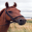

 0.0240
 0.0043
 0.0852
 0.1766
 0.0601
 0.0973
 0.0459
 0.3797
 0.0077
 0.1192
[torch.DoubleTensor of size 10]

airplane	0.023976090182731	
automobile	0.0042528902482791	
bird	0.085235484971879	
cat	0.17656023331081	
deer	0.060109839108854	
dog	0.097312080398426	
frog	0.04588924419839	
horse	0.37969706152354	
ship	0.0077416956551622	
truck	0.11922538040193	


4606	46.06 % 	


In [22]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])
predicted = net:forward(testset.data[100])
print(predicted:exp())
for i=1,predicted:size(1) do
    print(classes[i], predicted[i])
end

correct = 0
for i=1,10000 do
    local groundtruth = testset.label[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)  -- true means sort in descending order
    if groundtruth == indices[1] then
        correct = correct + 1
    end
end

print(correct, 100*correct/10000 .. ' % ')
